# Neural Network introduction

## NN with multiple layers

In [56]:
import numpy as np

In [57]:
# to get PIL -> pip install Pillow
from PIL import Image
from IPython.display import display

def red_png(path, factor=0.3, yes=0 , source = "DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine"):
    '''This function to display a reduce image.png
    Args:
        path : directory/image.png
        factor : the reduction factor
        yes : set to 0 by default, if put to 1 it means that the size before and after will be displayed
    '''
    img = Image.open(path)
    if yes:
        print("Taille d'origine :", img.size)

    # Redimensionner l'image à 50% de sa taille d'origine
    new_size = (int(img.width * factor), int(img.height * factor))
    img_resized = img.resize(new_size)

    # Afficher la nouvelle taille de l'image
    if yes:
        print("Nouvelle taille :", img_resized.size)

    # Afficher l'image redimensionnée dans le notebook
    display(img_resized)
    print(f'Source: ', source)

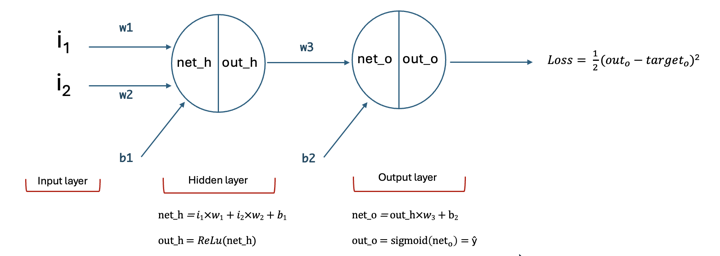

Source:  David-Tbo


In [58]:
red_png(r'./../png/Multiple_layers_1.png', source = "David-Tbo", factor=.4)

Neural Network with:  

- Two inputs features 0.1 and 0.5
- One target = 0.2
- One hidden layer with a single unit and a ReLu activation function,
- One output layer with a sigmoid activation function

1. Write the initialisation of this NN
2. Write the sigmoid function, the quadratic MSE loss function, the forward pass and the backpropagation
3. Train the NNN

**STEP 1: initialisation**

In [59]:
# 1. Initialisation step:

# For reproducibility
np.random.seed(0)

i1 = 0.1
i2 = 0.5

# Inputs as a NumPy object
X = np.array([i1, i2])

target = 0.2

W_in = np.random.randn(2, 1) * 0.1
b_in = np.random.randn(1, 1)
W_out = np.random.randn(1, 1) * 0.1
b_out = np.random.randn(1, 1)

print(f"W_in : {W_in}")
print(f"b_in : {b_in}")
print(f"W_out : {W_out}")
print(f"b_out : {b_out}")

W_in : [[0.17640523]
 [0.04001572]]
b_in : [[0.97873798]]
W_out : [[0.22408932]]
b_out : [[1.86755799]]


**STEP 2: The functions**

In [60]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(z):
    return z * (1 - z)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def fwd_pass():

    # Hidden input linear transformation
    net_h = np.dot(X, W_in) + b_in

    # Hidden Non linear transformation
    out_h = relu(net_h).reshape(-1,1)

        # # Output linear transformation
    net_o = np.dot(out_h, W_out) + b_out

    out_o = sigmoid(net_o)

    return out_o

In [61]:
print(f"out_o : {fwd_pass()}")

out_o : [[0.89044741]]


In [62]:
# Check :)
net_h = i1*0.17640523 + i2*0.04001572 + 0.97873798
out_h = max(net_h, 0)
net_o = out_h*0.22408932 + 1.86755799
out_o = sigmoid(net_o)
print(f"net_h : {net_h}")
print(f"out_h : {out_h}")
print(f"net_o : {net_o}")
print(f"out_o : {out_o}")

net_h : 1.016386363
out_h : 1.016386363
net_o : 2.095319318941943
out_o : 0.8904474083026531


In [63]:
def mse(y_hat, y):
    """Quadratic Loss MSE"""
    return np.mean(y - y_hat)**2

In [64]:
initial_loss = mse(out_o, target)
print(f"Initial quadratic Loss MSE : {initial_loss}")

Initial quadratic Loss MSE : 0.4767176236318505


In [65]:
# The gradients

# Input hidden layer
dloss_dw1 = (out_o - target) * out_o * (1 - out_o) * W_out * relu_derivative(net_h) * X[0]
dloss_dw2 = (out_o - target) * out_o * (1 - out_o) * W_out * relu_derivative(net_h) * X[1]
dloss_db1 = (out_o - target) * out_o * (1 - out_o) * W_out * relu_derivative(net_h) * 1

# Input output layer
dloss_dw3 = (out_o - target) * out_o * (1 - out_o) * out_h
dloss_db2 = (out_o - target) * out_o * (1 - out_o) * 1

print(f"dloss_dw1: {dloss_dw1}")
print(f"dloss_dw2: {dloss_dw2}")
print(f"dloss_db1: {dloss_db1}")
print(f"dloss_dw3: {dloss_dw3}")
print(f"dloss_db2: {dloss_db2}")

dloss_dw1: [[0.00150932]]
dloss_dw2: [[0.00754662]]
dloss_db1: [[0.01509325]]
dloss_dw3: 0.06845739414932754
dloss_db2: 0.06735371177872398


In [66]:
# Updates the weights
lr = 0.01

W_in[0, 0] -= lr * dloss_dw1
W_in[1, 0] -= lr * dloss_dw2
b_in -= lr * dloss_db1

W_out -= lr * dloss_dw3
b_out -= lr * dloss_db2

/var/folders/tb/_m1wm0vd633_w2zg_9vw_19m0000gn/T/ipykernel_70690/1220177476.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W_in[0, 0] -= lr * dloss_dw1
/var/folders/tb/_m1wm0vd633_w2zg_9vw_19m0000gn/T/ipykernel_70690/1220177476.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W_in[1, 0] -= lr * dloss_dw2


In [67]:
print(f"After one forward pass quadratic Loss MSE {mse(fwd_pass(), target)}")

After one forward pass quadratic Loss MSE 0.47652735599513085


In [71]:
import numpy as np

np.random.seed(0)

class NNsimple:
    def __init__(self, input_size, hidden_size, output_size, learning_rate, epochs):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights_ih = np.random.randn(input_size, hidden_size)
        self.bias_h = np.zeros(hidden_size)
        self.weights_ho = np.random.randn(hidden_size, output_size)
        self.bias_o = np.zeros(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(x, 0)

    def forward(self, X):
        self.hidden = self.sigmoid(np.dot(X, self.weights_ih) + self.bias_h)
        self.output = np.dot(self.hidden, self.weights_ho) + self.bias_o
        return self.output

    def mse_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def backprop(self, X, y_true):
        delta_o = -2 * (y_true - self.output)
        delta_h = delta_o.dot(self.weights_ho.T) * self.hidden * (1 - self.hidden)
        self.weights_ho += self.hidden.T.dot(delta_o) * self.learning_rate
        self.bias_o += np.sum(delta_o, axis=0, keepdims=True) * self.learning_rate
        self.weights_ih += X.T.dot(delta_h.reshape(-1, 1)) * self.learning_rate
        self.bias_h += np.sum(delta_h, axis=0, keepdims=True) * self.learning_rate

    def fit(self, X, y_true):
        for epoch in range(self.epochs):
            self.forward(X)
            loss = self.mse_loss(y_true, self.output)
            self.backprop(X, y_true)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        return self.forward(X)

# Example usage
X = np.array([[0.1, 0.5]])  # Ensure X is a 2D array
y_true = np.array([[0.2]])    # Ensure y_true is a 2D array

perceptron = NNsimple(input_size=2, hidden_size=1, output_size=1, learning_rate=0.1, epochs=100)
perceptron.fit(X, y_true)


ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (1,1)